In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

In [15]:
iris=load_iris()
x=iris.data
y=iris.target

In [16]:
pca=PCA(n_components=2)
pca=pca.fit(x)
x_dr=pca.transform(x)
x_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

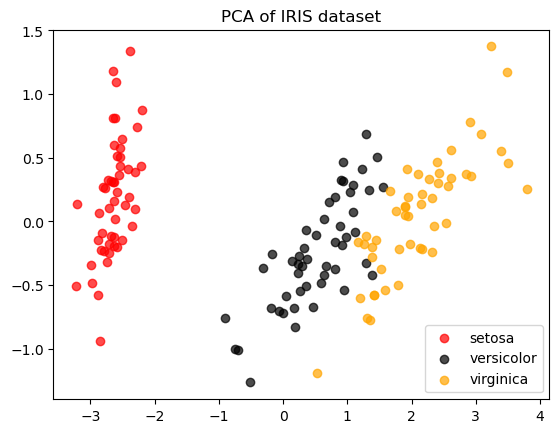

In [17]:
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
        plt.scatter(x_dr[y == i, 0],x_dr[y == i, 1],alpha=.7,c=colors[i]
,label=iris.target_names[i])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比

In [18]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [19]:
pca.explained_variance_ratio_.sum()

0.977685206318795

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，
所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使用这种输入方式。但我们
却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。
累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献
率为纵坐标的曲线，能够帮助我们决定n_components最好的取值。

In [20]:
import numpy as np
pca_line=PCA().fit(x)
pca_line.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

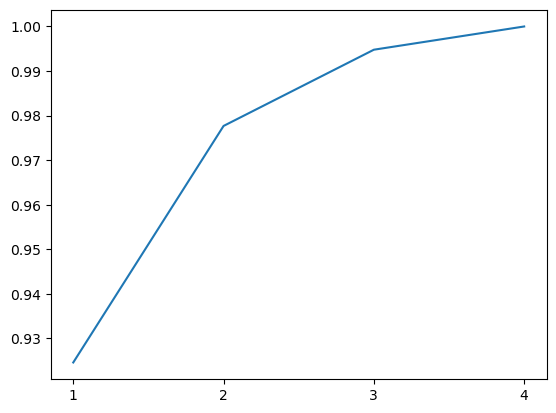

In [21]:
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.show()

使用mle自动选

In [22]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(x)
X_mle = pca_mle.transform(x)
X_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [23]:
pca_f=PCA(n_components=0.97,svd_solver="full")
pca_f=pca_f.fit(x)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [24]:
from sklearn.datasets import load_digits

In [27]:
digits=load_digits()
digits.data.shape

(1797, 64)

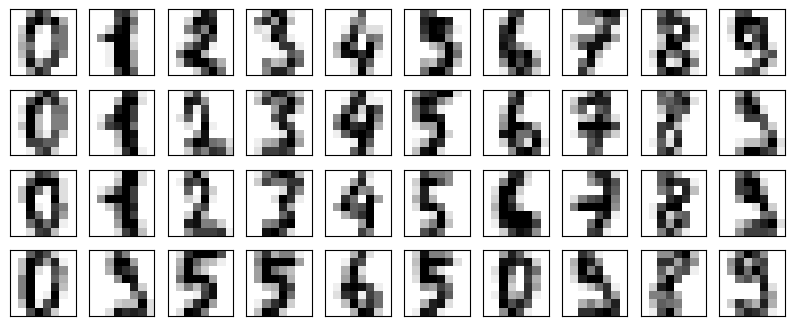

In [30]:
def plot_digits(data):
    fig,axes=plt.subplots(4,10,figsize=(10,4),subplot_kw = {"xticks":[],"yticks":[]})
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

plot_digits(digits.data)

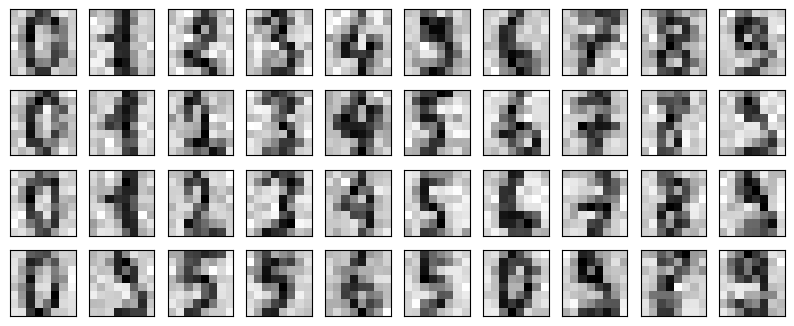

In [31]:
np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

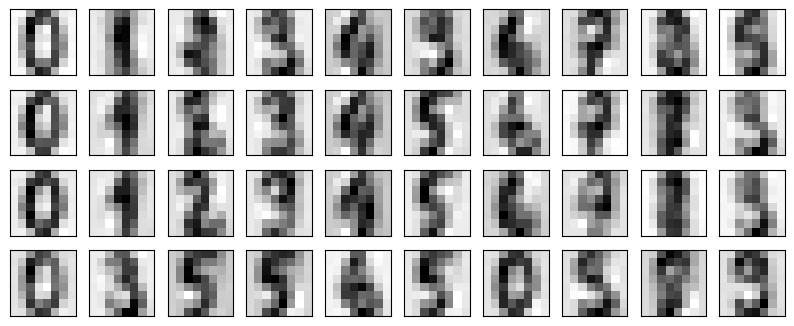

In [34]:
pca=PCA(0.5).fit(noisy)
x_dr=pca.transform(noisy)
x_new=pca.inverse_transform(x_dr)
plot_digits(x_new)